<a href="https://colab.research.google.com/github/ezNobson/Customer_Segmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Reading Data

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv" #we use famous dataset Titanic.csv
df = pd.read_csv(url)

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info() # we can see that in column 5 and 10 we have some Nan values so we have to work on that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Nan analysis

In [ ]:
missing_values = df.isnull().sum() #we can see what is the percentage of our missing data
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Brakujące wartości': missing_values,
    'Procent brakujących': missing_percentages
})
missing_data


,Brakujące wartości,Procent brakujących
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


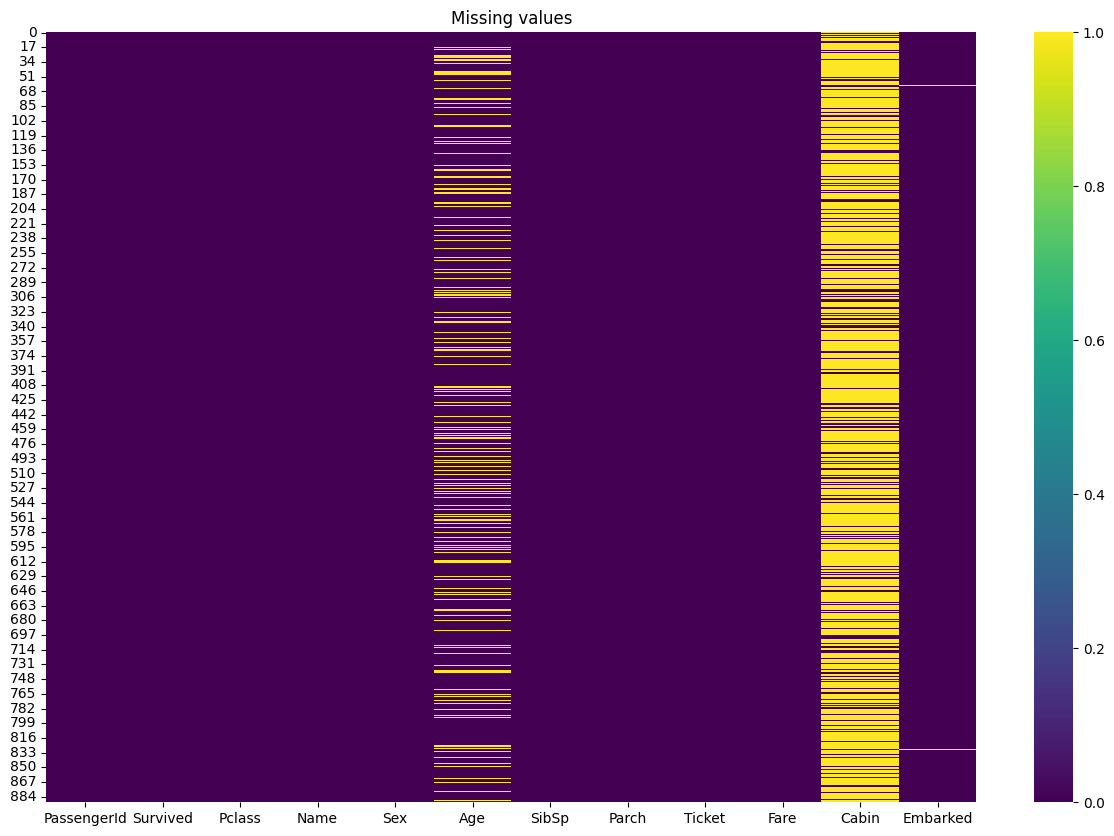

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing values')
plt.show()

We see that in cabin column there is majority of Nan
Let's see once again our data types in each column





In [ ]:
df.info() # so we have a numerical and object values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
categorical_col = df.select_dtypes(include=['object']).columns

And see once again a statistics for each column but this time we do it for numerical and categorical ones

In [ ]:
print("Numerical columns statistics:")
print(df[numerical_col].describe().T)

print("\nCategorical columns statistics:")
print(df[categorical_col].describe().T)

Numerical columns statistics:
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  

Categorical columns statistics:
         count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex     

Let' see our valeus in a Cabin column

In [ ]:
df['Cabin'].value_counts() # we see that there is a bunch of diffrent vallues so
# in our exploration we can either replace Nan of the value that occurs the most
# or we can skip that column because if we wanted to build for example a model around this dataset
# this column as a feature wouldn't be helpful so we could just drop it

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [ ]:
# to clean our data I'll build a function
def clean_data(df):
  df_cleaned = df.copy() #it's better to make a copy rather than working on a raw data

  age_mean = df_cleaned['Age'].mean()
  new_age = df_cleaned['Age'].fillna(age_mean) # we raplace Nan in Age column of mean of age

  df_cleaned = df_cleaned.drop('Cabin', axis=1)

  df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0]) #we fill it of the value which occur the most

  return df_cleaned

In [ ]:
df_cleaned = clean_data(df)

df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can now show a differecne the age before and after cleaning

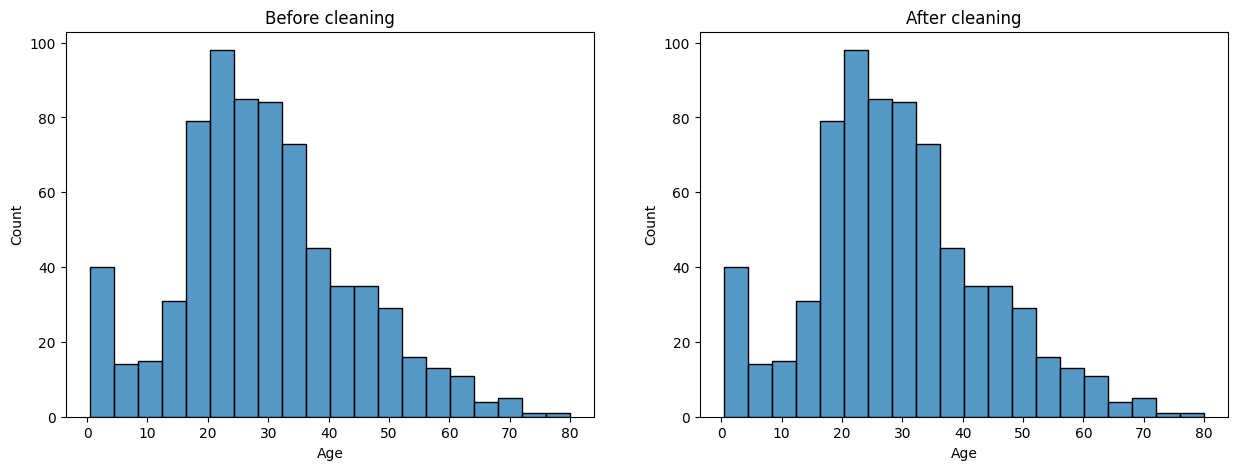

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='Age', ax=ax1)
ax1.set_title('Before cleaning')


sns.histplot(data=df_cleaned, x='Age', ax=ax2)
ax2.set_title('After cleaning')

plt.show()

We see that it doesnt differ that the previous one

Now lets see the correlation between some features

In [ ]:
df_cleaned[numerical_col].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Better to see that on the heatmap

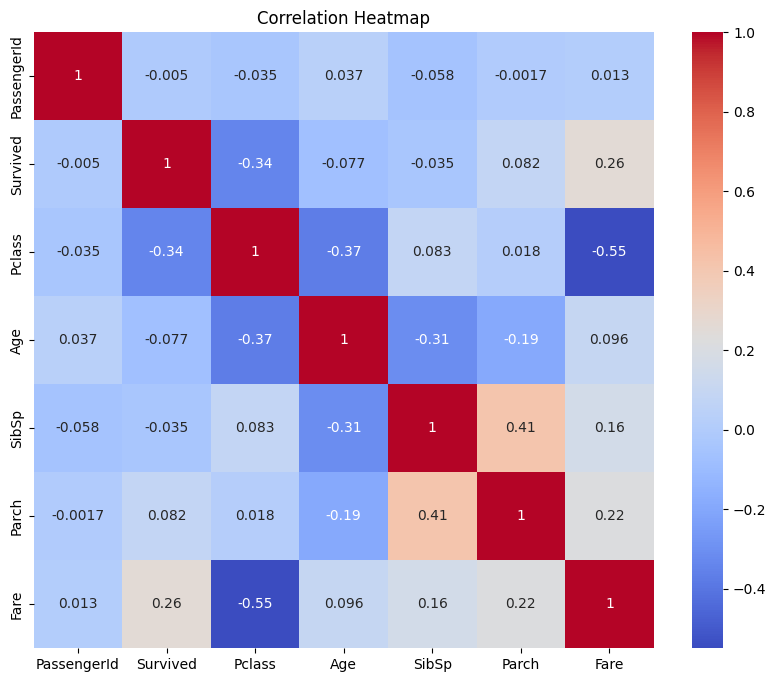

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Before showing a heatmap we could assume that the most likely that the survival feature would be strongly connected with age because younger are more likely to survive such a disaster but our data shows that it isn't like that

We can see that also on a boxplot

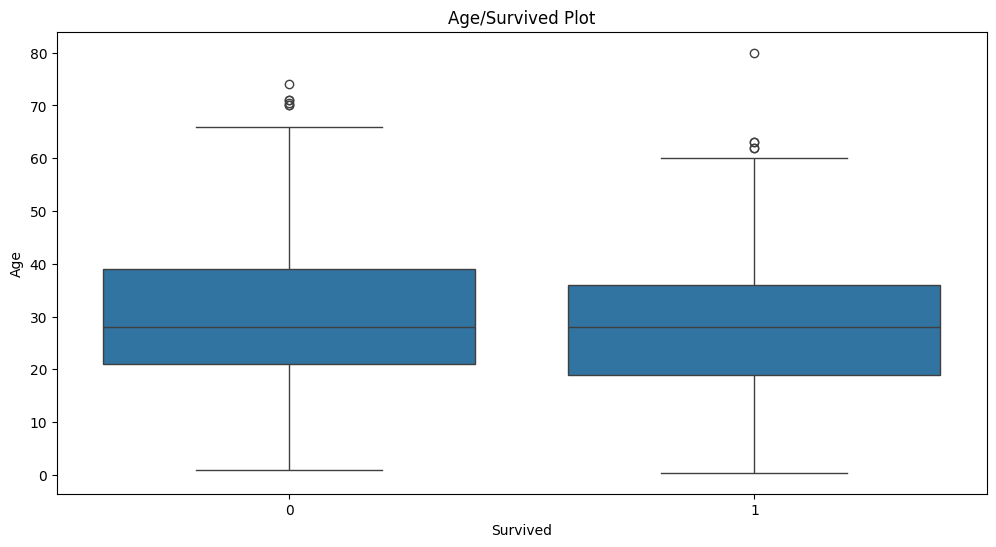

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Survived', y='Age')
plt.title('Age/Survived Plot')
plt.show()

Thanks to previous heatmap we see that the strongest impact on survival has a Pclass feature

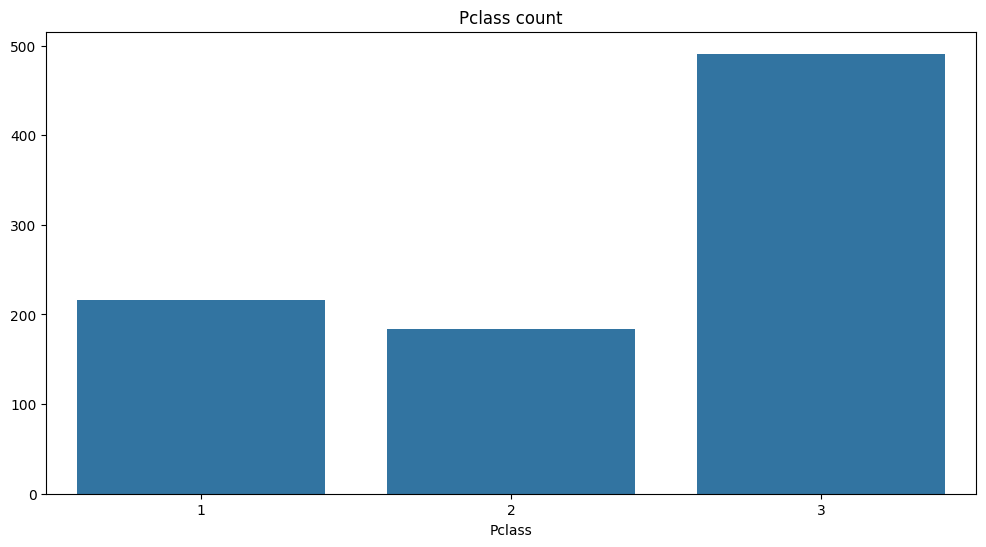

In [ ]:
counts = df_cleaned['Pclass'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Pclass count')
plt.show()

In [ ]:
df_new = df_cleaned[ df_cleaned['Survived'] ==1] # we see that the 3 class has the biggest values of survived
counts_surv = df_new['Pclass'].value_counts()

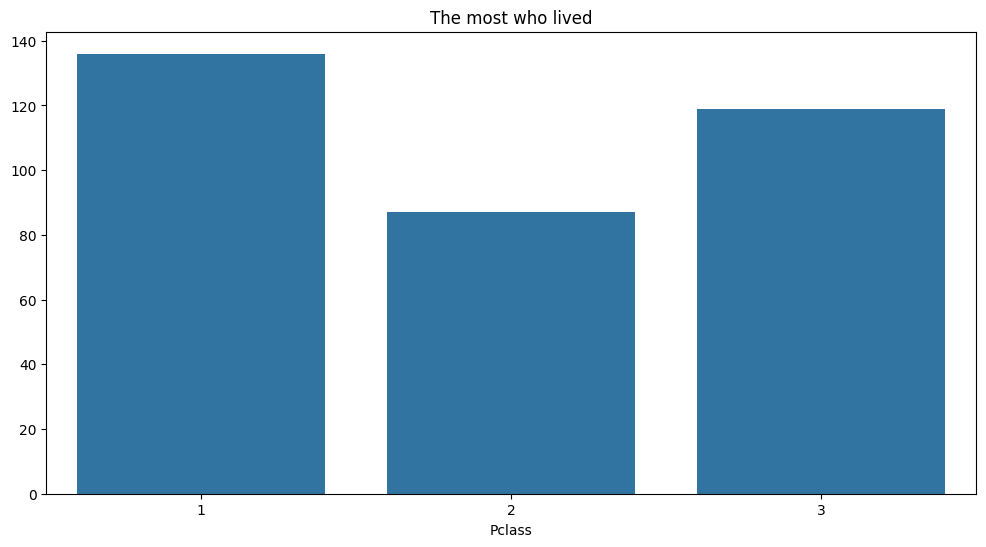

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=counts_surv.index, y=counts_surv.values)
plt.title('The most who lived')
plt.show()

According to plot we see that even tough 1 class had less passengers than the 3, people who were in 1st class had higher chances of survivig

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now we can also add new features for example if someone was alone or family members

In [ ]:
df_cleaned['Family_size'] = df_cleaned['SibSp'] + df_cleaned['Parch'] + 1

In [ ]:
df_cleaned['isAlone'] = (df_cleaned['Family_size'] == 1).astype(int)

In [ ]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


Now we can see what was the ralation beetween survival and Family_size

In [ ]:
df_cleaned[['Survived', 'Family_size']].corr() #There was insignicicant correlation

,Survived,Family_size
Survived,1.000000,0.016639
Family_size,0.016639,1.000000


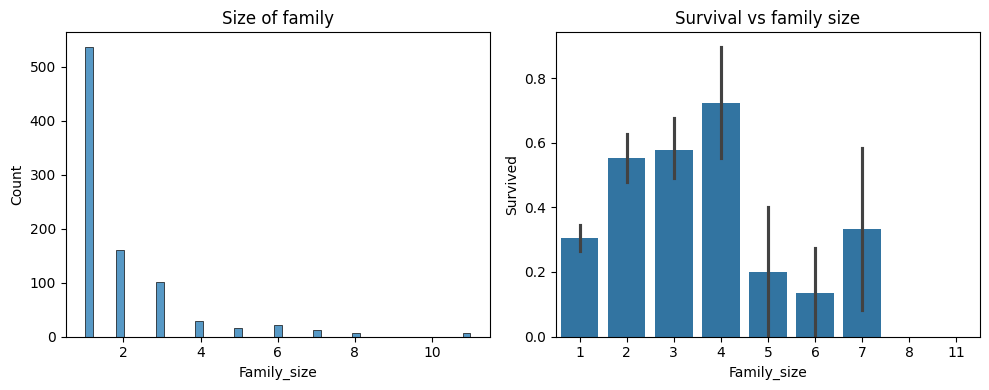

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=df_cleaned, x='Family_size', ax=axes[0])
axes[0].set_title('Size of family')


sns.barplot(data=df_cleaned, x='Family_size', y='Survived', ax=axes[1])
axes[1].set_title('Survival vs family size')

plt.tight_layout()
plt.show()